In [1]:
import numpy as np
import matplotlib as plt
from testCases import *
from planar_utils import *

%matplotlib inline
np.random.seed(1)

In [2]:
X, Y = load_planar_dataset()

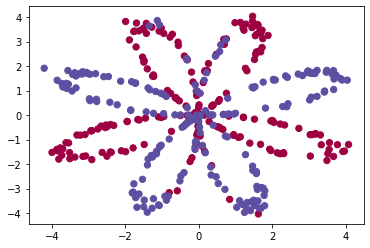

In [3]:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

In [4]:
print(X.shape,Y.shape)

(2, 400) (1, 400)


In [5]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)


In [6]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    paramaters = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    return paramaters

In [7]:
def forward_propagation(X, paramaters):
    W1 = paramaters['W1']
    b1 = paramaters['b1']
    W2 = paramaters['W2']
    b2 = paramaters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {
        'A1': A1,
        'Z1': Z1,
        'A2': A2,
        'Z2': Z2
    }
    return A2, cache

In [8]:
def compute_cost(A2, Y, paramaters):
    m = Y.shape[1]
    j = np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2))
    cost = np.sum(j)/(-m)
    
    cost = np.squeeze(cost)
    return cost

In [9]:
def backward_propagation(paramaters, cache, X, Y):
    W1 = paramaters['W1']
    b1 = paramaters['b1']
    W2 = paramaters['W2']
    b2 = paramaters['b2']
    
    Z1 = cache['Z1']
    A1 = cache['A1']
    Z2 = cache['Z2']
    A2 = cache['A2']
    
    m = Y.shape[1]
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1,2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m
    
    grads = {
        'dW1':dW1,
        'db1':db1,
        'dW2':dW2,
        'db2':db2
    }
    return grads

In [10]:
def update_parameters(paramaters, grads, learning_rate=1.2):
    W1 = paramaters['W1']
    b1 = paramaters['b1']
    W2 = paramaters['W2']
    b2 = paramaters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db2']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    paramaters = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    
    
    return paramaters

In [11]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)

        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [12]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.291635
Cost after iteration 2000: 0.262047
Cost after iteration 3000: 0.248362
Cost after iteration 4000: 0.251164
Cost after iteration 5000: 0.247871
Cost after iteration 6000: 0.244905
Cost after iteration 7000: 0.242990
Cost after iteration 8000: 0.241482
Cost after iteration 9000: 0.240200


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

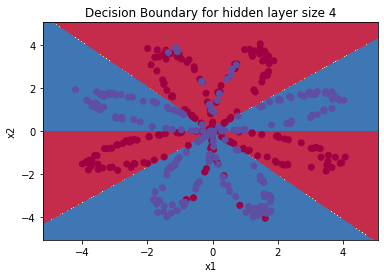

In [13]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0, :])
plt.title("Decision Boundary for hidden layer size " + str(4))

In [14]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 89%
